In this paper (https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

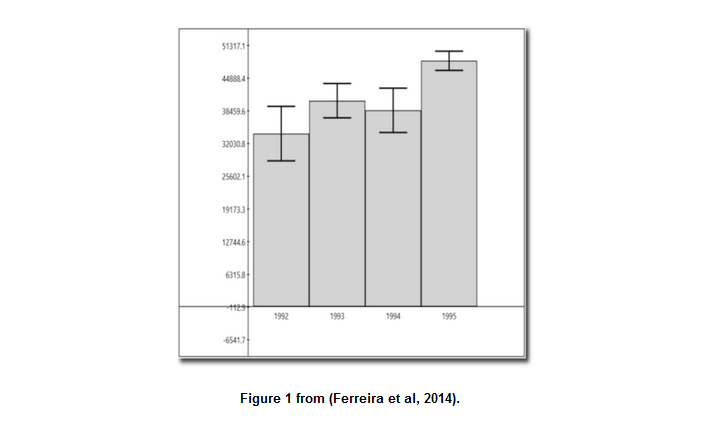

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.

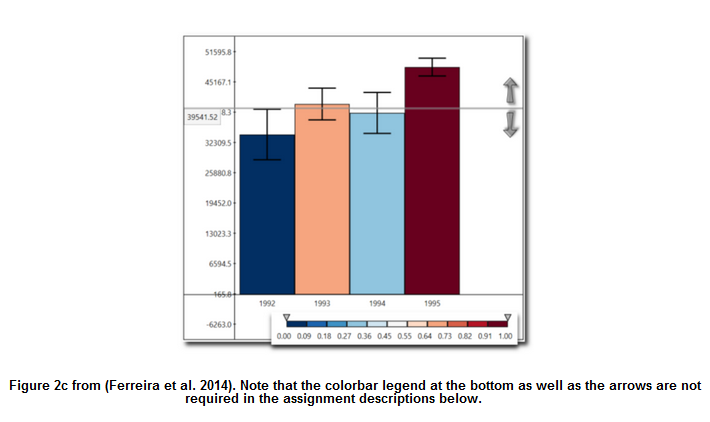

Easiest option: Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.

Harder option: Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm # used for the colorbar
from scipy.stats import norm # used for the normal distribution

Data given:

In [102]:
np.random.seed(12345)

df = pd.DataFrame([
    np.random.normal(32000, 200000, 3650),
    np.random.normal(43000, 100000, 3650),
    np.random.normal(43500, 140000, 3650),
    np.random.normal(48000, 70000, 3650)
], index=[1992, 1993, 1994, 1995])

Extracting important data from the df:

In [103]:
means = df.mean(axis=1)
sds = df.std(axis=1)
years = df.index

Defining the input value, the probability used and the color scale used:

In [104]:
threshold = 42000 # input value

probs_below = norm.cdf((means - threshold) / sds) # cdf stands for cumulative distribution function

normalize = plt.Normalize(vmin=0, vmax=1) # probabilities between 0 and 1
cc = ['RdBu', 'Grays', 'Blues'] # colors used
cmap = cm.get_cmap(cc[0])
cpick = cm.ScalarMappable(cmap=cmap, norm=normalize)
cpick.set_array([])

C:\Users\thoma\AppData\Local\Temp\ipykernel_13384\1783790945.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cc[0])


Calculating important info with the formulas provided by the normal distribution in order to use it to plot the bars and their confidence levels correctly:

In [105]:
scale_factor = 1.96
scaled_sds = sds / np.sqrt(len(df.columns)) * scale_factor

Plotting:

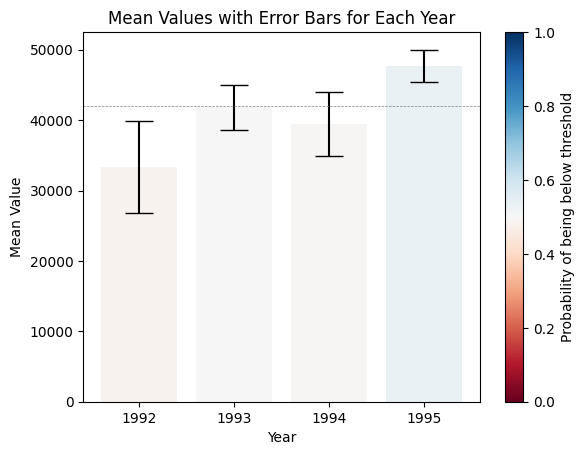

In [106]:
fig, ax = plt.subplots()
bars = plt.bar(years, means, yerr=scaled_sds, capsize=10, color=cpick.to_rgba(probs_below)) # plotting the bars
plt.axhline(threshold, color="gray", linestyle="--", linewidth=0.5) # line showing the y location of the threshold

plt.xticks([1992, 1993, 1994, 1995], years) # correcting the x-axis

fig.colorbar(cpick, ax=ax, orientation='vertical', label='Probability of being below threshold') # creating and labeling the colorbar

plt.title("Mean Values with Error Bars for Each Year")
plt.xlabel("Year")
plt.ylabel("Mean Value")

plt.show();